<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(3_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.947958,46.576617,25.064118,-50.773346,108.815347,179.425076,-70.609729
1,0.0,1.0,80.313958,36.974386,79.155045,228.100229,434.543618,566.042658,-131.499040
2,0.0,2.0,57.323058,97.494246,22.514954,-2183.780085,-1996.447827,108.147907,-2104.595734
3,0.0,3.0,84.582638,92.886609,62.446303,2014.420273,2264.335823,614.043996,1650.291827
4,0.0,4.0,89.657484,62.713492,48.200699,-107.693608,102.878066,482.716934,-379.838868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.687228,99.127126,76.324498,-50.645851,228.493000,171.241042,57.251959
59996,999.0,56.0,89.880101,84.531556,61.790029,-914.428073,-668.226387,216.605622,-884.832009
59997,999.0,57.0,53.894633,61.047785,82.879081,294.434028,502.255526,191.182673,311.072853
59998,999.0,58.0,51.721584,62.145284,21.414583,-1573.542551,-1428.261100,-11.156697,-1417.104403


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    77.947958  46.576617  ...  179.425076   -70.609729
      1.0    80.313958  36.974386  ...  566.042658  -131.499040
      2.0    57.323058  97.494246  ...  108.147907 -2104.595734
      3.0    84.582638  92.886609  ...  614.043996  1650.291827
      4.0    89.657484  62.713492  ...  482.716934  -379.838868
...                ...        ...  ...         ...          ...
999.0 55.0   93.687228  99.127126  ...  171.241042    57.251959
      56.0   89.880101  84.531556  ...  216.605622  -884.832009
      57.0   53.894633  61.047785  ...  191.182673   311.072853
      58.0   51.721584  62.145284  ...  -11.156697 -1417.104403
      59.0   51.519009  46.418887  ...  334.273827   702.263463

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    77.947958  46.576617  ...  179.425076   -70.609729
      1.0    80.313958  36.974386  ...  566.042658  -131.499040
      2.0    57.323058  97.494246  ...  108.147907 -2104.595734
      3.0    84.582638  92.886609  ...  614.043996  1650.291827
      4.0    89.657484  62.713492  ...  482.716934  -379.838868
...                ...        ...  ...         ...          ...
999.0 55.0   93.687228  99.127126  ...  171.241042    57.251959
      56.0   89.880101  84.531556  ...  216.605622  -884.832009
      57.0   53.894633  61.047785  ...  191.182673   311.072853
      58.0   51.721584  62.145284  ...  -11.156697 -1417.104403
      59.0   51.519009  46.418887  ...  334.273827   702.263463

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.947958,46.576617,25.064118,-50.773346,108.815347,179.425076,-70.609729
1,0.0,1.0,80.313958,36.974386,79.155045,228.100229,434.543618,566.042658,-131.499040
2,0.0,2.0,57.323058,97.494246,22.514954,-2183.780085,-1996.447827,108.147907,-2104.595734
3,0.0,3.0,84.582638,92.886609,62.446303,2014.420273,2264.335823,614.043996,1650.291827
4,0.0,4.0,89.657484,62.713492,48.200699,-107.693608,102.878066,482.716934,-379.838868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.687228,99.127126,76.324498,-50.645851,228.493000,171.241042,57.251959
59996,999.0,56.0,89.880101,84.531556,61.790029,-914.428073,-668.226387,216.605622,-884.832009
59997,999.0,57.0,53.894633,61.047785,82.879081,294.434028,502.255526,191.182673,311.072853
59998,999.0,58.0,51.721584,62.145284,21.414583,-1573.542551,-1428.261100,-11.156697,-1417.104403


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    77.947958  46.576617  ...  179.425076   -70.609729
      1.0    80.313958  36.974386  ...  566.042658  -131.499040
      2.0    57.323058  97.494246  ...  108.147907 -2104.595734
      3.0    84.582638  92.886609  ...  614.043996  1650.291827
      4.0    89.657484  62.713492  ...  482.716934  -379.838868
...                ...        ...  ...         ...          ...
999.0 55.0   93.687228  99.127126  ...  171.241042    57.251959
      56.0   89.880101  84.531556  ...  216.605622  -884.832009
      57.0   53.894633  61.047785  ...  191.182673   311.072853
      58.0   51.721584  62.145284  ...  -11.156697 -1417.104403
      59.0   51.519009  46.418887  ...  334.273827   702.263463

[60000 rows x 7 columns]

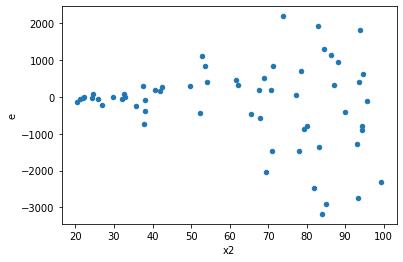

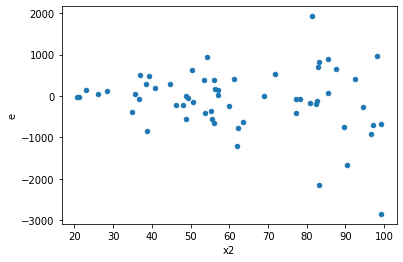

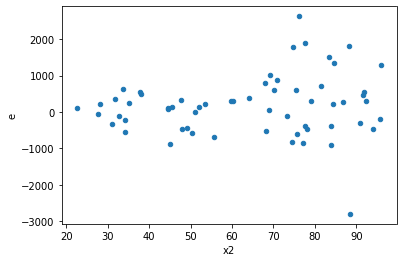

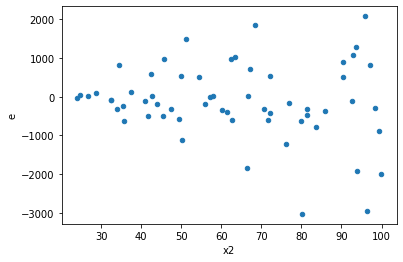

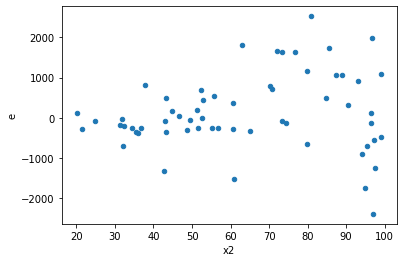

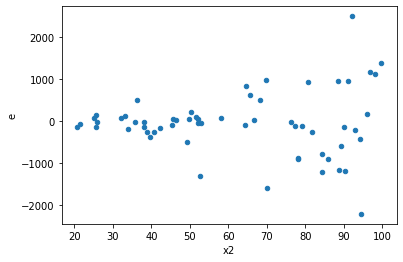

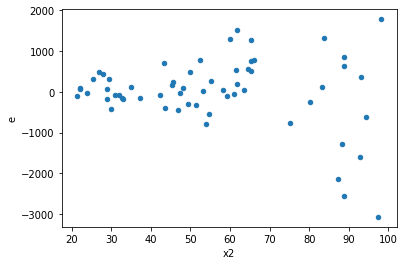

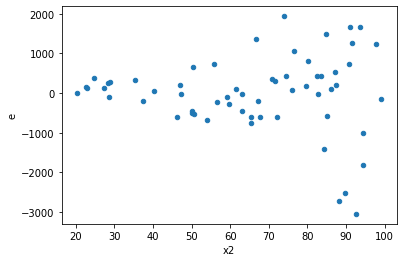

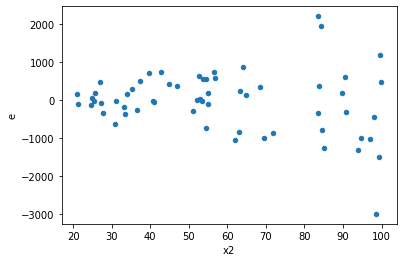

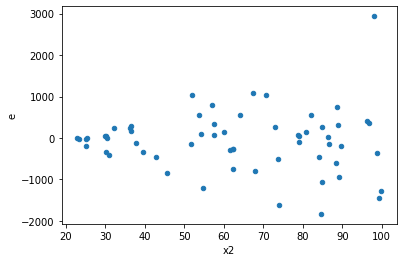

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,24.0,30.0,14744903.236436255,42488644.40316493,614370.968184844,1416288.1467721644,2.305265417987736,0.03129138439702017,0.9843543078014899,0.015645692198510086,Reject005=0 : Heteroscedasticity
3.0,23.0,31.0,12238538.810736958,29270941.33239303,532110.3830755199,944223.9139481623,1.7744887977766692,0.13621297865056392,0.931893510674718,0.06810648932528196,Reject005=1 : Homoscedasticity
4.0,20.0,34.0,2108348.7539125704,21914449.380106192,105417.43769562853,644542.6288266527,6.114193656344018,4.353635072895656e-06,0.9999978231824636,2.176817536447828e-06,Reject005=0 : Heteroscedasticity
5.0,24.0,30.0,2569111.944608503,35994906.80540938,107046.33102535429,1199830.2268469792,11.208513317124297,5.4925719528142736e-09,0.999999997253714,2.7462859764071368e-09,Reject005=0 : Heteroscedasticity
8.0,19.0,35.0,12559078.610975914,37686351.05422353,661004.1374197849,1076752.8872635295,1.6289654274580045,0.2066364867171797,0.8966817566414101,0.10331824335858986,Reject005=1 : Homoscedasticity
9.0,26.0,28.0,11009815.561750043,30318328.753998403,423454.444682694,1082797.4554999429,2.557057716825508,0.01679589830106276,0.9916020508494686,0.00839794915053138,Reject005=0 : Heteroscedasticity
13.0,24.0,30.0,6917270.614184382,35389348.18443668,288219.60892434925,1179644.9394812225,4.09286843419058,0.00035580070131135955,0.9998220996493443,0.00017790035065567977,Reject005=0 : Heteroscedasticity
15.0,30.0,24.0,13473973.442763045,17898728.72211611,449132.4480921015,745780.3634215045,1.6604909455764167,0.20611560978896248,0.8969421951055188,0.10305780489448124,Reject005=1 : Homoscedasticity
16.0,24.0,30.0,9785659.678395567,29775708.618818786,407735.8199331486,992523.6206272929,2.4342320985927226,0.02197951273418819,0.9890102436329059,0.010989756367094095,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,32.0,22.0,80770717.51924573,3536964.494710712,2524084.922476429,160771.11339594147,0.06369481151933898,3.305349719235049e-11,Reject005=0 : Heteroscedasticity
1.0,24.0,30.0,14744903.236436255,42488644.40316493,614370.968184844,1416288.1467721644,2.305265417987736,0.03129138439702017,Reject005=0 : Heteroscedasticity
2.0,25.0,29.0,21035577.487234525,3692814.3376561985,841423.0994893811,127338.42543642064,0.15133697365058812,8.480374029303147e-06,Reject005=0 : Heteroscedasticity
3.0,23.0,31.0,12238538.810736958,29270941.33239303,532110.3830755199,944223.9139481623,1.7744887977766692,0.13621297865056392,Reject005=1 : Homoscedasticity
4.0,20.0,34.0,2108348.7539125704,21914449.380106192,105417.43769562853,644542.6288266527,6.114193656344018,4.353635072895656e-06,Reject005=0 : Heteroscedasticity
5.0,24.0,30.0,2569111.944608503,35994906.80540938,107046.33102535429,1199830.2268469792,11.208513317124297,5.4925719528142736e-09,Reject005=0 : Heteroscedasticity
6.0,34.0,20.0,39690710.66357328,22941677.37552462,1167373.8430462729,1147083.868776231,0.9826191289183807,0.9376359566069775,Reject005=1 : Homoscedasticity
7.0,29.0,25.0,29140746.49998199,4299034.756022174,1004853.3275855858,171961.39024088695,0.17113083623265465,1.2197405031310103e-05,Reject005=0 : Heteroscedasticity
8.0,19.0,35.0,12559078.610975914,37686351.05422353,661004.1374197849,1076752.8872635295,1.6289654274580045,0.2066364867171797,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    558
Reject005=1 : Homoscedasticity      442
Name: Result_test, dtype: int64